Findings:

- No LMCI entries in ADNI 1, GO, or 4 phases
- No AD entries in ADNI GO

Count of each research group with the following filters: All ADNI phases, MRI, Sagittal plane

AD (5636)
CN (14189)
LMCI (2900)
MCI (14259)

- Zip download of smallest set (LMCI) takes 8 hours... talk to Mike Renfro?

OR

- continue to narrow down our data?
- options: only look at entries from a certain phase (does this defeat purpose of longitudinal study?); max 2 images from each unique ID (hard to filter, will need to download all anyways for min 8 hrs and then remove later...)
- if we only look at phases ADNI 2 and 3, this cuts down the CN set to 7913 entries, and MCI is cut down to 3176.
- if we only look at phase ADNI 2, the smallest sets, AD and LMCI, still have 1627 and 2544 entries respectively
ADNI2_AD (1627)
ADNI2_CN (4402)
ADNI2_LMCI (2544)
ADNI2_MCI (1201)

With these filters, we will still need to inquire abt HPC Cluster, even with limit to ADNI 2 phase, downloading the smallest set (MCI: 1201) takes 4 hours and almost 8GB...

**2/19**

stick with ADNI 2

try out DCM library

work on report (**due 2/27**)

DX_bl vs DX where DX == Dementia: 921

- Changing Research Question?? Dementia instead of Alzheimers [pending]

- comma separated list from Haley of Patient IDs to look at images

In [ ]:
!pip install pydicom
import pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00


In [ ]:
dir(pydicom)

['DataElement',
 'Dataset',
 'FileDataset',
 'Sequence',
 '__all__',
 '__builtins__',
 '__cached__',
 '__dicom_version__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__version_info__',
 '_dicom_dict',
 '_private_dict',
 '_uid_dict',
 '_version',
 'charset',
 'config',
 'data',
 'datadict',
 'dataelem',
 'dataset',
 'dcmread',
 'dcmwrite',
 'dicomdir',
 'encaps',
 'encoders',
 'errors',
 'filebase',
 'filereader',
 'fileutil',
 'filewriter',
 'jsonrep',
 'misc',
 'multival',
 'overlays',
 'pixel_data_handlers',
 'read_file',
 'sequence',
 'tag',
 'uid',
 'util',
 'valuerep',
 'values',
 'warnings',
 'waveforms',
 'write_file']

In [ ]:
ds = pydicom.read_file("/content/ADNI_037_S_0150_MR_gre_field_mapping__br_raw_20160316100611421_39_S396129_I655234.dcm")

FileNotFoundError: [Errno 2] No such file or directory: '/content/ADNI_037_S_0150_MR_gre_field_mapping__br_raw_20160316100611421_39_S396129_I655234.dcm'

In [ ]:
ds

In [ ]:
ds2 = pydicom.dcmread("/content/ADNI_127_S_0925_MR_3-plane_localizer__br_raw_20161116122126966_9_S513786_I793609.dcm")

In [ ]:
ds2

/usr/local/lib/python3.10/dist-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.06279230344779385614'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.08684683501388030060'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.07658823654379164137'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.1037264841389790048
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.8067347773067732742
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_354'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 536
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 2.16.124.113543.6006.99.10372648

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
if 'PixelData' in ds2:
    rows = int(ds2.Rows)
    cols = int(ds2.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(ds2.PixelData)))
    if 'PixelSpacing' in ds2:
        print("Pixel spacing....:", ds2.PixelSpacing)

# Pixel data can be used to plot the CT scan

Image size.......: 256 x 256, 131072 bytes
Pixel spacing....: [1.0156, 1.0156]


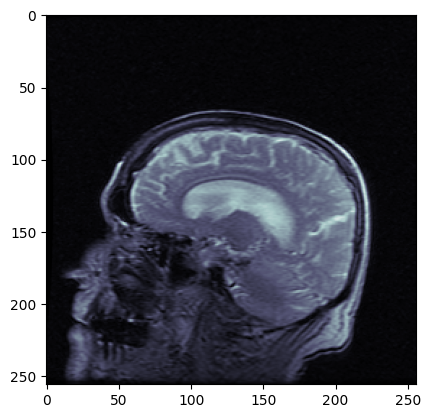

In [ ]:
plt.imshow(ds2.pixel_array, cmap=plt.cm.bone)
plt.show()

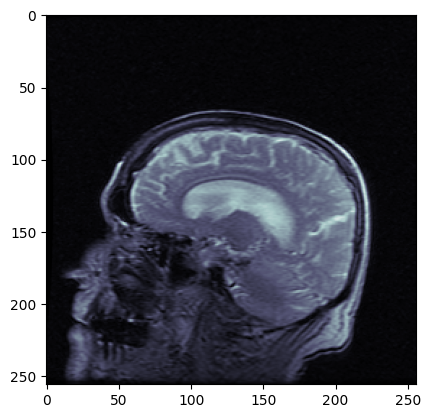

In [ ]:
image_path = '/content/ADNI_127_S_0925_MR_3-plane_localizer__br_raw_20161116122126966_9_S513786_I793609.dcm'
ds = pydicom.dcmread(image_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.bone)